In [29]:
#https://www.kaggle.com/grouplens/movielens-20m-dataset  -- dataset link

import numpy as np
import pandas as pd

In [30]:
g_tags=pd.read_csv('genome_tags.csv')
g_scores=pd.read_csv('genome_scores.csv')
movies=pd.read_csv('movie.csv')
ratings=pd.read_csv('rating.csv')
tags=pd.read_csv('tag.csv')

In [31]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [33]:
x=ratings['userId'].value_counts()>500
movie_lover=x[x].index.tolist()
ratings=ratings[ratings['userId'].isin(movie_lover)]
ratings.shape

(6554416, 4)

In [34]:
df=pd.merge(movies,ratings,on='movieId')

In [35]:
df.reset_index(drop=True,inplace=True)

In [36]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0,2001-07-04 07:02:29
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,54,4.0,2000-11-21 21:00:21
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,2006-04-03 10:00:08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,4.0,2005-03-22 22:46:02


In [75]:
df.shape

(6554416, 6)

## EDA

In [37]:
#Let's explore the data a bit and get a look at some of the best rated movies.

## Visualization Imports

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [39]:
#Let's create a ratings dataframe with average rating and number of ratings:

In [40]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Oranges (2004)                                            5.0
Stuck Between Stations (2011)                             5.0
Reel Bad Arabs: How Hollywood Vilifies a People (2006)    5.0
Dead Time: Kala (2007)                                    5.0
Only Daughter (2013)                                      5.0
Name: rating, dtype: float64

In [41]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Matrix, The (1999)           6938
Forrest Gump (1994)          6870
Jurassic Park (1993)         6824
Back to the Future (1985)    6807
Pulp Fiction (1994)          6767
Name: rating, dtype: int64

In [42]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.000000
$ (Dollars) (1971),3.142857
$5 a Day (2008),3.050000
$9.99 (2008),2.970588
$ellebrity (Sellebrity) (2012),3.500000


In [43]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.000000,2
$ (Dollars) (1971),3.142857,7
$5 a Day (2008),3.050000,10
$9.99 (2008),2.970588,17
$ellebrity (Sellebrity) (2012),3.500000,1


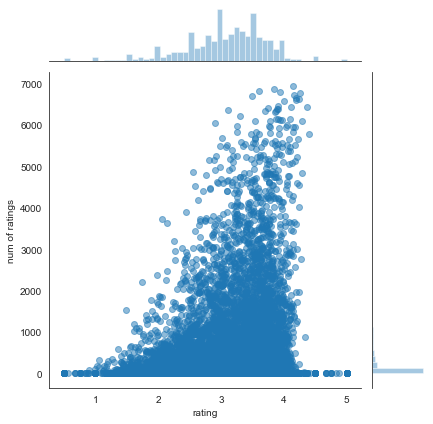

In [44]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

## Recommending Similar Movies

In [45]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,4.0,2001-07-04 07:02:29
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,54,4.0,2000-11-21 21:00:21
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0,2006-04-03 10:00:08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,91,4.0,2005-03-22 22:46:02


In [46]:
moviemat = df.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",'Neath the Arizona Skies (1934),'R Xmas (2001),...,xXx: State of the Union (2005),"¡Alambrista! (Illegal, The) (1977)",¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Åsa-Nisse - Wälkom to Knohult (2011),貞子3D (2012)
userId,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
"Matrix, The (1999)",4.145287,6938
Forrest Gump (1994),3.843304,6870
Jurassic Park (1993),3.603898,6824
Back to the Future (1985),3.932496,6807
Pulp Fiction (1994),4.256391,6767
"Silence of the Lambs, The (1991)",4.166914,6725
Men in Black (a.k.a. MIB) (1997),3.488147,6707
Star Wars: Episode IV - A New Hope (1977),4.187359,6653
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),4.246797,6635


In [48]:
ratings.head()

,rating,num of ratings
title,,
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.000000,2
$ (Dollars) (1971),3.142857,7
$5 a Day (2008),3.050000,10
$9.99 (2008),2.970588,17
$ellebrity (Sellebrity) (2012),3.500000,1


In [50]:
starwars_user_ratings = moviemat['Star Wars: Episode IV - A New Hope (1977)']
starwars_user_ratings.head()

userId
11    5.0
24    5.0
54    4.0
58    NaN
91    4.5
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [51]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

C:\Users\tuhin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\tuhin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [52]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
$ (Dollars) (1971),0.153897
$5 a Day (2008),-0.633054
$9.99 (2008),-0.134963
'71 (2014),-0.427743
'Hellboy': The Seeds of Creation (2004),0.132323


In [53]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"Linguini Incident, The (1991)",1.0
King Kong Escapes (Kingu Kongu no gyakushû) (1967),1.0
"Red Bear, A (Un oso rojo) (2002)",1.0
And Along Come Tourists (Am Ende kommen Touristen) (2007),1.0
Forgiven (2007),1.0
Cold Storage (2000),1.0
"Split, The (1968)",1.0
Viimeiset rotannahat (1985),1.0
"Lawless Frontier, The (1934)",1.0


In [54]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
$ (Dollars) (1971),0.153897,7
$5 a Day (2008),-0.633054,10
$9.99 (2008),-0.134963,17
'71 (2014),-0.427743,21
'Hellboy': The Seeds of Creation (2004),0.132323,10


In [55]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,6653
Star Wars: Episode V - The Empire Strikes Back (1980),0.737476,6607
Star Wars: Episode VI - Return of the Jedi (1983),0.657489,6460
My Father's Glory (La gloire de mon père) (1990),0.516746,175
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.490149,6635


In [56]:
text='Star Wars: Episode IV - A New Hope (1977)'

In [73]:
def movie_rec(text):
    movie_name=text
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings['num of ratings'])
    return corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).iloc[:3,:0].head(3)
    
text=input("Enter the name of a movie for recommendation :")
print("The recommended movies are :\n")
movie_rec(text)

Enter the name of a movie for recommendation :Matrix, The (1999)
The recommended movies are :



""
title
"Matrix, The (1999)"
"Matrix Reloaded, The (2003)"
Appleseed (Appurushîdo) (2004)
